> To live! like a tree alone and free,
> and like a forest in brotherhood/sisterhood...
> Nazim Hikmet

<center> <h1> Random Forests (Yes! No Forest Image) </h1> </center>



## Objectives

- Review of decision trees

- Defining Bootstrapping process

- Explaining the need for bootstrapping

- Identifying the need for bootstrapping for decision trees.

- Comparing Random forests and bagging methods

- Evaulating a model by random forest model

<center> <h1> Bootstrapping </h1> </center>

<img src= "img/bootstrapping2.jpg" style="height:400px">


Consider a case that we want to invest to either X or Y a fixed amount of money.

- $\alpha$ amount to X and $1- \alpha$ amount to Y

- We want to minimize variance in our investment! This is minimize $V(\alpha X + (1-\alpha )Y)$

- The $\alpha$ that minimizes the variance: 

$$ \alpha = \frac{\sigma^{2}_{Y} - \sigma_{XY}}{\sigma_{X}^{2} + \sigma^{2}_{Y} - 2\sigma_{XY}}$$

where $\sigma_{XY}$ is the covariance of X and Y. 

Q: Do you see the problem here?

Hint: Let's rewrite the equation with hats! What are the hats refering to ?


$$ \widehat{\alpha}= \frac{\widehat{\sigma}^{2}_{Y} - \widehat{\sigma}_{XY}}{\widehat{\sigma}_{X}^{2} + \widehat{\sigma}^{2}_{Y} - 2\widehat{\sigma}_{XY}}$$

Q: How much do we certain about $\widehat{\alpha}$?


In [35]:
import numpy as np 


In [36]:
sample = np.random.multivariate_normal(mean = [10,10], cov = [[1, 0.5], [0.5, 1.25]] , size = 100)


In [37]:
sigma_x = sample[:,0].var()

sigma_y = sample[:, 1].var()

sigma_xy = np.cov(sample.T)[0,1]

print(np.cov(sample.T))

alpha_hat = (sigma_y - sigma_xy)/(sigma_x + sigma_y - 2* sigma_xy)

print(alpha_hat)

[[0.99735743 0.25945276]
 [0.25945276 0.90208312]]
0.4653621924570016


In [34]:
alphas = []

for i in range(1000):
    s = np.random.multivariate_normal(mean = [10,10], cov = [[1, 0.5], [0.5, 1.25]] , size = 100)
    s_x = s[:,0].var()
    s_y = s[:,1].var()
    s_xy = np.cov(s.T)[0,1]
    print(np.cov(s.T)[0,1])
    a_hat = (s_y - s_xy)/(s_x + s_y - 2* s_xy)
    alphas.append(a_hat)
    


0.5195361821755667
0.5163081259773138
0.5776303590454931
0.5214549662512847
0.2919674779682003
0.617011157532976
0.30599281573670106
0.4967745479944156
0.35373752128798064
0.44667497886379415
0.2839005594662113
0.33770268740411574
0.446497659577753
0.31542400008111876
0.5200731727866308
0.3546100968746212
0.5399829317536008
0.45099289061956177
0.4484299091327264
0.511591523757392
0.30355941063151065
0.4954303776772138
0.4858417400611333
0.31432161872693964
0.5443538306589861
0.5305147151757392
0.317746426825778
0.5362384709923
0.5132944420575488
0.1910072873087951
0.4585868531693756
0.32876280508151967
0.44436624278136466
0.43664180023999316
0.3979536970063701
0.6551988687820895
0.47912875815745165
0.5004937780716087
0.6601776026542675
0.3956892841986929
0.6422360487517016
0.5146598793852452
0.7952507463955465
0.4381054343692712
0.5290875950346979
0.6630551059510362
0.5577436959942079
0.7398676102578231
0.48906192043147756
0.5018496044184348
0.5671861485595173
0.49539117370551483
0.484

In [ ]:
a = sample.ravel()
s = np.random.choice(a, size=(1000,100), replace=True)
s_x = s.var(axis=1)
s_y = s.var(axis=1)
s_xy = np.cov()
a_hat = (s_y - s_xy)/(s_x + s_y - 2* s_xy)


In [22]:
len(alphas)

1000

/home/will/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


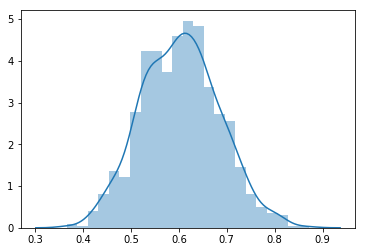

In [30]:
import seaborn as sns
sns.distplot(alphas)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
np.mean(alphas)

0.6035309263107236

In [32]:
# find the mean of the alphas
np.std(alphas, ddof=1)

0.08101560596481867

In [ ]:
bootstrap= np.random.choice()

Q: what is wrong with this approach?

A: What can we do about this -- Bootstapping 


In [129]:
## Bootstrapping

boot_sample = sample[np.random.choice(np.arange(100), replace = True, size = 100)]

np.unique(boot_sample, return_counts= True, axis = 0)[1]

## Homework: find alpha_hats with bootstrapping

array([1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 6, 2, 3, 1, 3, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 2, 3, 2])

<img src= "img/bootstrap1.png" style="height:400px">


### Bagging


Let's us one more time recall that if $Z_{1}, \cdots, Z_{n}$ are independent observations with variance $\sigma^{2}$ then the variance of the mean $\bar{Z}$ is given by $\frac{\sigma^{2}}{n}$. 

So what?

We will use this idea calculate $$ \hat{f}^{1}(x), \cdots, \hat{f}^{B}(x)$$ where each $\hat{f}^{i}$ represents a decision tree fitted to the bootstrapped data.


Then we will make a prediction by: 

$$ \hat{f}_{\text{avg}}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{b}(x)$$

Note that this is for regression and for the classification we can get majority vote.

__Problem__ We still have some problem with this approach and random forests will address this problem. Can you see the issue?

- If we have a strong predictor then this will dominate in each tree.





In [132]:
import pandas as pd

In [141]:
## you can download the data from -- https://www.kaggle.com/ishaanv/ISLR-Auto#Heart.csv

## or http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
heart = pd.read_csv('data/Heart.csv', index_col = 0)

In [146]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [158]:
heart.dropna(axis= 0, how= 'any', inplace = True)

y = heart.AHD

heart.drop(columns= 'AHD', inplace = True)

In [160]:
X = pd.get_dummies(heart)

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 7,  oob_score=True)

In [236]:
from sklearn.model_selection import cross_validate

In [237]:
cv = cross_validate(rfc, X, y,return_estimator= True, cv = 5 )

In [238]:
cv['test_score']

array([0.83333333, 0.91666667, 0.76271186, 0.79661017, 0.81355932])

In [241]:
est = cv['estimator'][3]

In [253]:
est.oob_score_

0.8235294117647058

In [257]:
est.feature_importances_

index = X.columns.tolist()

In [261]:
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])

In [267]:
feat_imp.sort_values(by = 'importances', ascending = False)

,importances
Thal_normal,0.119966
Ca,0.113553
Oldpeak,0.112316
MaxHR,0.100357
ChestPain_asymptomatic,0.089637
Thal_reversable,0.085006
Age,0.078399
RestBP,0.071167
Chol,0.062618
ExAng,0.038043


### Extra Material 

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Discussion on Random Forests and overfitting](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)